## 4.1 从线性模型讲起

万事都有个起源。就像我们小时候写字，都是从一横一竖、一撇一捺开始学起一样。别嫌弃它的简单，其中却蕴含了深刻的哲学思想。道家不是说“一生二，二生三，三生万物”吗？机器学习其实也是一样，它很多的思想都是在模拟人的智慧，因此也是从最简单的开始。这就是传说中的线性模型了。我们在《机器学习必修课》中对线性模型用了专门一章进行了特别深入详细的介绍，让你从根上深刻理解这种思想的基本原理和精妙之处。这个思想学好了，一通百通，很多机器学习算法，比如决策树、随机森林、SVM、神经网络都能理解的更加到位。本章侧重深度学习，因此仅简单回顾线性回归问题的主要思想，然后快速进入到神经网络的学习中，你只要能弄明白神经网络其实就是很多个线性模型的组合就行了。



### 4.1.1 什么是回归问题


回归，英文是regression，可以认为是机器学习中最简单最基本的任务。直观理解就是根据过去的一堆数据进行预测。人类最本源的智能抽象出来，其中一种就可以叫做回归，也就是根据过去的经验数据预测下一步发生的事情。回归问题可以帮助我们对未来的趋势或变化做出预测，例如，预测房价趋势、预测股票价格波动等。

统计学把这个过程用严谨的数学模型表示了出来。训练数据通常包含一组输入特征和一个连续的输出值，目标是建立一个模型，通过学习这些训练数据来预测新的输入数据的输出值。回归模型中最简单的就是我们初中学过的直线方程，也就是传说中的线性回归。

为了评估回归模型的精度，我们通常使用均方误差（Mean Squared Error, MSE）或平均绝对误差（Mean Absolute Error, MAE）作为度量标准，这就是所谓的目标函数，有时也叫损失函数。均方误差是指预测值与真实值之差的平方和的平均数，而平均绝对误差则是指预测值与真实值之差的绝对值的平均数。较低的均方误差或平均绝对误差表明模型的预测精度较高。

回归问题在许多领域都有广泛应用，例如金融、房地产、市场预测、天气预报、医学诊断等。模型的精度对于决策的正确性和风险的评估都非常重要。回归问题有许多不同的模型算法可供选择，这些算法的选择取决于数据的特征、输出的类型和问题的复杂程度。例如，线性回归是一种简单的回归模型，其假设输入与输出之间存在一个线性关系，而决策树回归则可以处理更复杂的非线性关系。除了基本的回归算法之外，还有许多其他的回归技术，例如岭回归、贝叶斯回归、弹性网络回归等，可以用于解决更复杂的回归问题。回归问题也可以与其他机器学习技术结合使用，例如模型集成方法，可以通过将多个回归模型结合起来，来提高预测精度。这些都是机器学习课程的内容，如果你不熟悉或者感兴趣，欢迎访问我们的课程学习。


###  4.1.2 线性回归的基本思想

线性回归是一种广泛使用的统计学方法，用于研究两个变量之间的关系。假设有一个输入变量 x 和一个输出变量 y，这两个变量之间存在一个线性关系，即$ y = w  x + b$。其中，w 和 b 是线性回归模型的参数，x 是输入变量，y 是输出变量。

线性回归的目标是找到一组最优的 w 和 b，使得模型能够尽可能准确地预测 y。为了实现这一目标，我们需要一组训练数据，包括输入变量和输出变量的值。我们可以使用这些数据来计算 w 和 b 的最优值。

线性回归的优点在于简单易行，容易理解和实现。它可以适用于许多不同的应用场景，并且在很多情况下都能取得较好的预测效果。当然，线性回归也有一些局限性。它假设输入变量和输出变量之间存在线性关系，如果数据的真实关系不是线性的，那么线性回归的预测效果就会变差。另外，线性回归只能处理一个输入变量的情况，如果输入变量有多个，就需要使用其他方法，比如多元线性回归或者其他模型。

说一千道一万，不如来个实际的例子演示一遍更直接。下面咱们就用一个简单的实例，带你理解一下线性回归模型的训练流程。一边讲思路，一边看公式，一边用python代码编程实现。


### 4.1.3 线性模型的例子

假设我们希望通过研究学生的学习时间和考试成绩之间的关系，来预测学生的考试成绩。
我们收集了 10 名学生的学习时间 x 和考试成绩 y 的数据，如下表所示：


|学习时间	|考试成绩 |
|----------|----------|
|1	| 22 |
|1.5	| 30 |
|2	| 25 |
|2.5	| 50 |
|3	| 45 |
|3.5	| 75 |
|4	| 70 |
|4.5	| 78 |
|5	| 83 |
|5.5	| 91 |

我们希望通过线性回归的方法来建立一个模型，预测学生的考试成绩。具体怎么办呢？首先，我们假设模型的形式为 $y = w * x + b$。没错就这么简单，这就是传说中的机器学习模型了！现在的目的是要求解 w 和 b 的最优值。为此先要确定一个目标函数。这是个什么鬼呢？


### 4.1.4 损失函数

在机器学习中，目标函数是用于衡量预测模型的性能的函数。它可以帮助我们评估模型的准确度，并帮助我们决定是否需要对模型进行调整。

目标函数通常是建立在训练数据集上的，并且在训练过程中不断优化。通常，我们会使用梯度下降算法来不断调整模型的参数，使得目标函数的值越来越小。

常见的目标函数包括均方误差 (mean squared error, MSE) 和交叉熵 (cross-entropy)。均方误差是常用于回归问题的目标函数，它衡量的是预测值与真实值之间的差距，很多时候又被称为最小二乘法，其实是一回事。最小二乘就是最小平方差的意思。交叉熵则常用于分类问题，它衡量的是模型的预测概率分布与真实概率分布之间的差距。

说点人听得懂的大白话，就是先确立一个标准。在上面的例子中，最简单的就是预测值和真实值之间的均方误差嘛！为啥要平方，很简单啊，否则会出现正负误差。这其实是统计中非常简单和常见的一个计算标准。用公式来表示就是：

$ w = Σ(x_i - x̄) (y_i - ȳ)) / Σ(x_i - x̄)^2 $ 

$ b = ȳ - w \cdot x̄ $

其中，x̄ 和 ȳ 分别表示 x 和 y 的平均值，i 从 1 到 n。

In [45]:
import numpy as np
x = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
y = np.array([22,30,25,50,45,75,70,78,83,91])

x_mean = np.mean(x)
y_mean = np.mean(y)
m = 0
n = 0
for i,j in zip(x,y):
    m += (i-x_mean)*(j-y_mean)
for i in x:
    n += (i-x_mean)*(i-x_mean)
w = m/n
b = y_mean - w*x_mean
print(w,b)

16.327272727272728 3.836363636363636


使用这些公式，可以直接计算出线性回归模型的参数 w 和 b 的值。例如，假设我们使用上表中的数据来计算，得到的结果为 w = 16.32，b = 3.83。
这就意味着，我们得到了一个线性回归模型：y = 16.32 * x + 3.83。使用这个模型，就可以预测学生的考试成绩。例如，假设一名学生学习了 3 小时，用这个模型预测他的考试成绩为 52 分。

这就是一个最简单线性回归的例子了。通过收集学习时间和考试成绩的数据，使用最小二乘法来估计线性回归模型的参数，并使用模型来预测学生的考试成绩。

是不是有点不敢相信？！就这么简单吗？你的质疑也有道理，如果所有的问题都是这么简单就好了，压根也不需要统计学和机器学习了。事实上，很多时候实际问题要远比这个例子复杂的多。复杂在哪里呢？首先数据量要大，动不动就是百万起，而且都是高维度的数据；其次，多数情况下目标函数要远比这个式子复杂的多，要知道线性模型，尤其是线性回归是最最简单的情况；第三，目标函数没有解析解了，也就是说把数据带进目标函数方程后求不出来了，这种情况下只能用计算机来逼近，这就是所谓的最优化方法。咱们用pytorch看看怎么用代码来求解上面的这个线性回归问题。走一遍下来你就彻底明白了。

首先，我们需要准备训练数据。在这个例子中，我们可以使用以下 Python 代码来准备训练数据：

In [11]:
import torch

# 准备训练数据
x = torch.tensor([[1], [1.5], [2], [2.5], [3], [3.5], [4], [4.5], [5], [5.5]], dtype=torch.float32)
y = torch.tensor([[22], [30], [25], [50], [45], [75], [70], [78], [83], [91]], dtype=torch.float32)

然后，我们需要定义线性回归模型。在 PyTorch 中，可以使用 nn.Linear 模块来定义线性回归模型。我们可以使用以下 Python 代码来定义线性回归模型：


In [12]:
import torch.nn as nn

# 定义线性回归模型
model = nn.Linear(1, 1)

你先别管这个Linear()函数内部是怎么实现的，就当它是刚定义的直线方程好了。实际上，它就是有一个神经元的极其简单的神经网络，我们稍后会讲神经网络其实就是由很多个线性模型组成的大的结构。所以最简单的神经元就是线性模型。咱们可以用这样的代码来模拟线性回归。

接下来，我们需要定义损失函数和优化器。在这个例子中，我们使用均方误差（mean squared error，MSE）作为损失函数，并使用随机梯度下降（SGD）作为优化器。得嘞，这个优化器是个啥呢？


### 4.1.5 优化器：随机梯度下降法


机器学习优化器是用于训练机器学习模型的算法。机器学习优化器可以分为基于梯度的优化器和非基于梯度的优化器。

基于梯度的优化器是基于损失函数的梯度来更新模型参数的。常用的基于梯度的优化器包括随机梯度下降（SGD）、动量法（Momentum）、Adagrad、RMSProp和Adam。

非基于梯度的优化器是基于非梯度信息来更新模型参数的。常用的非基于梯度的优化器包括模拟退火法（Simulated Annealing）和遗传算法（Genetic Algorithm）。

最简单的优化器是随机梯度下降（SGD）。它是一种基于梯度的优化器，在每次迭代时使用一个小的训练样本来计算损失函数的梯度。SGD的优点在于它简单易用，但是可能不够稳定，因为它可能会跳出最优解。

说这么多，就是先让你有点感性知识。一上来听不懂没关系，咱们先看代码例子一下子就明白了。不过这些信息我们会反复讲，你忍忍，反复听，开始不懂，听多了慢慢就懂了。这就像是瞎子摸象，开始只是看到一部分，慢慢拼凑出对问题的完整认知。直接上代码！


In [30]:
# 定义损失函数和优化器
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

是不是不敢相信自己的眼睛！就两行嘛！是的，就两行。前者指定损失函数，后者指定优化器SGD。要知道现在的机器学习算法都封装的很好了，洋洋洒洒说了半天，但实际上你根本不用关心其中执行的细节，一句话就能调用了。不过，要想真正理解其中的原理，还是要钻到函数的肚子里看清楚。这部分内容我们后续课程会再讲，你也可以选修我们的前置课程《机器学习必修课》，那里会掰开了揉碎了给你拆解清楚。都是学深度学习，是有不同境界的。要求不高的，能看懂代码会调包就行了，这叫知其然。如果你就是找个工作，混口饭吃，把自己定位为一个大厂小厂的工具人，攻城狮，程序员，这其实也就够了。但是如果还想混的好一点，那就要知其所以然，深入了解其中的工作原理，甚至要想通想透。

继续看代码。然后，我们可以开始训练模型了。我们可以使用以下 Python 代码来训练模型：


In [31]:
# 训练模型
losses = []  # 用于保存每次迭代的损失
for epoch in range(1000):
    # 前向传播
    y_pred = model(x)
    # 计算损失
    loss = loss_fn(y_pred, y)
    losses.append(loss.item())  # 将损失保存到数组中
    # 清空梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()

在训练过程中，我们使用前向传播来计算预测值，使用损失函数来计算损失，使用反向传播来计算梯度，然后使用优化器来更新模型参数。

最后，我们可以使用以下 Python 代码来查看训练后的模型的参数：


In [32]:
# 查看训练后的模型的参数
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[16.2470]], requires_grad=True)
Parameter containing:
tensor([4.1441], requires_grad=True)


这样，我们就使用 PyTorch 编写了一个线性回归的例子。我们通过收集学习时间和考试成绩的数据，使用最小二乘法来估计线性回归模型的参数，使用上表中的数据来计算，得到的结果为 w = 16.24，b = 4.14。


### 4.1.6 如何使用模型进行预测


模型训练出来了，怎么用它来预测呢？也很简单，代码继续！

为了使用训练得到的模型预测一个学生的成绩，我们需要先定义这个学生的学习时间 x。假设这个学生学习了 5 小时，我们可以使用以下 Python 代码来定义 x_test：

In [33]:
x_test = torch.tensor([5], dtype=torch.float32)

然后，我们可以使用以下 Python 代码来使用训练得到的模型预测这个学生的成绩 y：

In [34]:
y_pred = model(x_test)
print(y_pred)

tensor([85.3794], grad_fn=<AddBackward0>)


运行这段代码，就可以得到这个学生的成绩预测值 y_pred = 16.24* 5 + 4.14 = 85.37。

注意，这里的预测值 y_pred 是一个 PyTorch 张量，如果我们想要将其转换为 Python 的浮点数，可以使用以下代码：


In [35]:
prediction = y_pred.item()
print(prediction)

85.37937927246094


运行这段代码，就可以得到这个学生的成绩预测值，这个预测值就是 Python 的浮点数。


### 4.1.7 可视化展示模型


为了可视化地展示上述例子中的训练数据和训练得到的线性模型，我们可以使用 matplotlib 库。

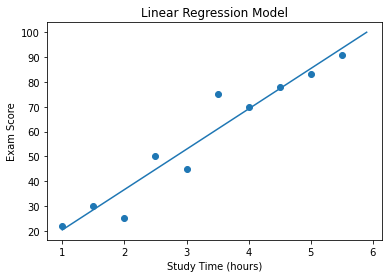

In [36]:
import matplotlib.pyplot as plt

# 可视化展示训练数据
plt.scatter(x, y)

# 可视化展示训练得到的线性模型
x_range = torch.arange(1, 6, 0.1).view(-1, 1)
y_pred = model(x_range)
plt.plot(x_range.numpy(), y_pred.detach().numpy())

plt.xlabel("Study Time (hours)")
plt.ylabel("Exam Score")
plt.title("Linear Regression Model")

plt.show()

在这段代码中，我们使用 plt.scatter 函数来可视化展示训练数据，使用 plt.plot 函数来可视化展示训练得到的线性模型。我们还可以使用 plt.xlabel、plt.ylabel 和 plt.title 函数来添加图表的标签和标题。最后，使用 plt.show 函数来显示图表。

运行这段代码，就可以看到训练数据和训练得到的线性模型的可视化展示。


为了可视化的显示训练的过程，可以添加这样一段代码：


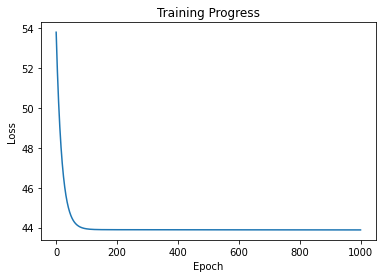

In [37]:
# 可视化展示训练过程
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.show()

运行后就能显示下面的图像，从中我们可以看出整个神经网络训练迭代了1000次，每次都把训练样本的数据算一遍得到一个损失，然后调整参数，不断减小训练的损失。在60多次的时候梯度下降法就收敛的不错了，纵轴的误差Loss就已经变的很小了。


**梗直哥提示：通过这样一个简洁的小例子，相比你已经对机器学习乃至于使用神经网络训练的大致流程有了感性的理解和认识。从代码量上可以说非常的简单，真正有用的就是几行，其他大多数是准备数据和输出结果或者是可视化数据或结果。真正的训练就是明确目标函数，优化器类型，然后就是一个for循环迭代，根据目标函数计算损失，然后反向传播，更新参数，齐活！基本上所有的深度学习训练都是这样一个套路。**


### 4.1.8 最小化均方误差和极大似然估计


我们经常听到最小化均方误差MSE，最小二乘法LSM （Least squares method)，还有极大似然估计MLE，很多同学晕头转向搞不清楚它们之间的关系。其实前两者是一回事，都是后面这种情况的特例。

在线性回归模型中，观测值y和预测值之间的差异可以用均方误差（MSE）来表示：



$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

其中 n是样本数量。最小二乘法的目标是最小化均方误差。

在线性回归模型中，如果我们假设观测值是独立同分布的高斯分布，即$y_i \sim \mathcal{N}(\mu, \sigma^2)$

其中均值为 $\mu$，方差为$\sigma^2$。

那么观测值的对数似然函数为：


$\begin{align} \log p(y|\hat{y}) &=\sum_{i=1}^n \log p(y_i|\hat{y}i) 
\nonumber\\
 &= \sum_{i=1}^n \log \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - \hat{y}i)^2}{2\sigma^2} \right) \nonumber\\ &= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \hat{y}_i)^2 
\end{align}
$

可以发现，观测值的对数似然函数与均方误差的形式是相似的。因此，最小化均方误差等价于最大化观测值的对数似然函数，即等价于线性模型在高斯分布下的最大似然估计。


<img src="../images/logo.jpg" alt="Drawing" style="width: 80px;" align="left"/>

#### 深入思考和进阶学习 ：
这部分内容涉及比较多的数学知识和机器学习的算法理解，如果你在这方面的基础不是很扎实，强烈建议回过头学好机器学习课程，否则各种概念会反复困扰你的理解，比如MLE、MAP和贝叶斯估计的区别联系等等。欢迎选修梗直哥[《机器学习必修课：python实战》](https://appmixy0usl5902.h5.xiaoeknow.com/)

[Next 4.2神经网络基本原理](./4-2%20神经网络基本原理.ipynb)